<a href="https://colab.research.google.com/github/figriaone192/UAS-BDDM/blob/main/Pengembangan_Machine_Learning_dengan_metode_Classification_(Gradient_Boosted_Tree_%2B_Hyperparameter)_pada_Dataset_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Membaca data
data = pd.read_csv('/content/covid_19.csv')
df = pd.DataFrame(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(data.dtypes)

Date                            object
Location ISO Code               object
Location                        object
New Cases                        int64
New Deaths                       int64
New Recovered                    int64
New Active Cases                 int64
Total Cases                      int64
Total Deaths                     int64
Total Recovered                  int64
Total Active Cases               int64
Location Level                  object
City or Regency                float64
Province                        object
Country                         object
Continent                       object
Island                          object
Time Zone                       object
Special Status                  object
Total Regencies                  int64
Total Cities                   float64
Total Districts                  int64
Total Urban Villages           float64
Total Rural Villages           float64
Area (km2)                       int64
Population               

In [ ]:
df.isnull().sum()

,0
Date,0
Location ISO Code,0
Location,0
New Cases,0
New Deaths,0
New Recovered,0
New Active Cases,0
Total Cases,0
Total Deaths,0
Total Recovered,0


In [ ]:
df.drop(columns=['City or Regency', 'Special Status', 'Longitude', 'Latitude',
                 'Location ISO Code', 'Location Level', 'Time Zone', 'Continent', 'Total Rural Villages', 'Total Urban Villages'
                 , 'Total Cities'  ], inplace=True)

# Menghapus baris data dengan Location 'Indonesia'
df = df[df['Location'] != 'Indonesia']

In [ ]:
# Mengubah tipe data pada kolom persentase
for col in ['Case Fatality Rate', 'Case Recovered Rate']:
    df[col] = df[col].str.replace('%', '').astype(float)

In [ ]:
df['Growth Factor of New Cases'] = df['Growth Factor of New Cases'].fillna(df['Growth Factor of New Cases'].mean())
df['Growth Factor of New Deaths'] = df['Growth Factor of New Deaths'].fillna(df['Growth Factor of New Deaths'].mean())

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
New Cases,0
New Deaths,0
New Recovered,0
New Active Cases,0
Total Cases,0
Total Deaths,0
Total Recovered,0
Total Active Cases,0


In [ ]:
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Districts,...,Population Density,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
count,30893.000000,30893.000000,30893.000000,30893.000000,3.089300e+04,30893.000000,3.089300e+04,30893.000000,30893.000000,30893.000000,...,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000,30893.000000
mean,207.079565,5.108568,200.840093,1.130903,8.204233e+04,2354.077202,7.681409e+04,2874.153303,12.240054,213.103551,...,756.954538,28.197475,11520.430172,0.640289,289.489398,28.948904,4.092969,87.076151,1.336134,1.031211
std,771.874452,22.344819,813.941207,558.652362,1.852533e+05,5471.624776,1.778584e+05,9003.791351,7.363519,169.082167,...,2768.150791,75.073338,16651.867316,1.951164,366.431814,36.643191,14.605512,144.725339,2.634138,1.288844
min,0.000000,0.000000,0.000000,-19976.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,1.000000,44.000000,...,8.590000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,4.905000e+03,121.000000,3.685000e+03,75.000000,7.000000,103.000000,...,47.790000,0.760000,1287.870000,0.000000,38.450000,3.850000,1.860000,76.500000,0.670000,0.900000
50%,24.000000,0.000000,18.000000,0.000000,2.268400e+04,539.000000,1.952100e+04,519.000000,11.000000,169.000000,...,103.840000,5.510000,6786.780000,0.000000,158.090000,15.810000,2.630000,90.390000,1.000000,1.000000
75%,113.000000,3.000000,106.000000,17.000000,6.467900e+04,1885.000000,6.116000e+04,2025.000000,15.000000,241.000000,...,262.700000,22.110000,14250.120000,0.520000,387.730000,38.770000,3.740000,96.640000,1.336134,1.031211
max,16251.000000,545.000000,23872.000000,13108.000000,1.412511e+06,33489.000000,1.386134e+06,188636.000000,29.000000,666.000000,...,16334.310000,1459.040000,130231.620000,63.800000,1632.600000,163.260000,1000.000000,11100.000000,175.000000,134.500000


In [ ]:
df.describe(include='object')

,Date,Location,Province,Country,Island
count,30893,30893,30893,30893,30893
unique,929,34,34,1,7
top,6/8/2021,DKI Jakarta,DKI Jakarta,Indonesia,Sumatera
freq,34,929,929,30893,9080


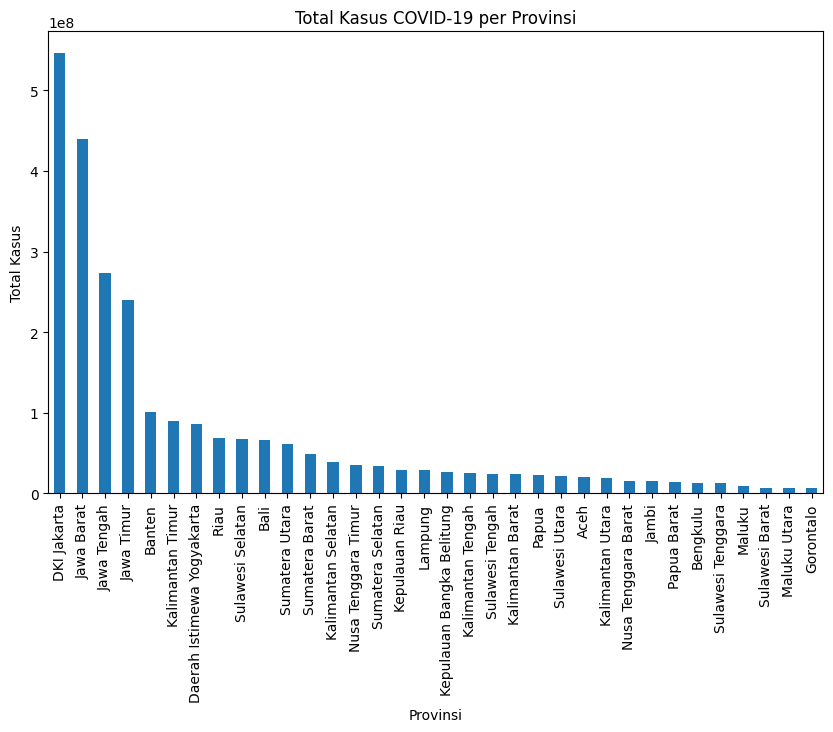

In [ ]:
#Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
df.groupby('Province')['Total Cases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Kasus COVID-19 per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Total Kasus')
plt.xticks(rotation=90)
plt.show()

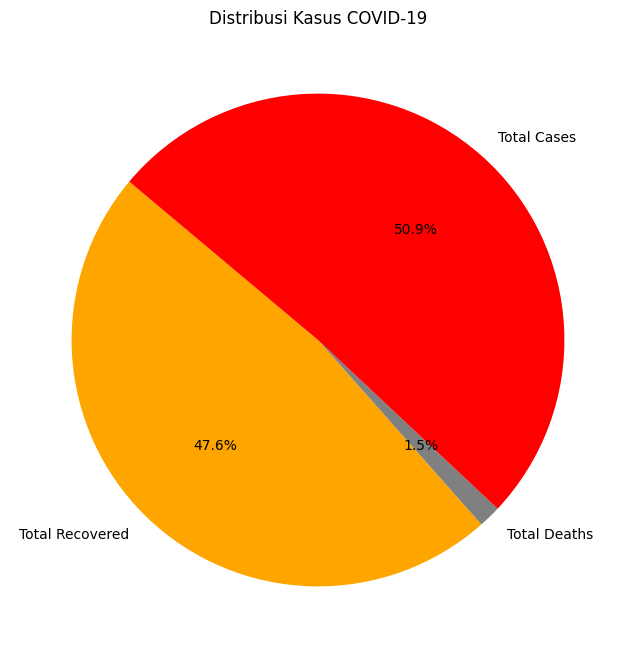

In [ ]:
labels = ['Total Recovered', 'Total Deaths', 'Total Cases']
sizes = [df['Total Recovered'].sum(), df['Total Deaths'].sum(), df['Total Cases'].sum()]
colors = ['orange', 'gray', 'red']  # Custom colors
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors) # Apply colors
plt.title('Distribusi Kasus COVID-19')
plt.show()

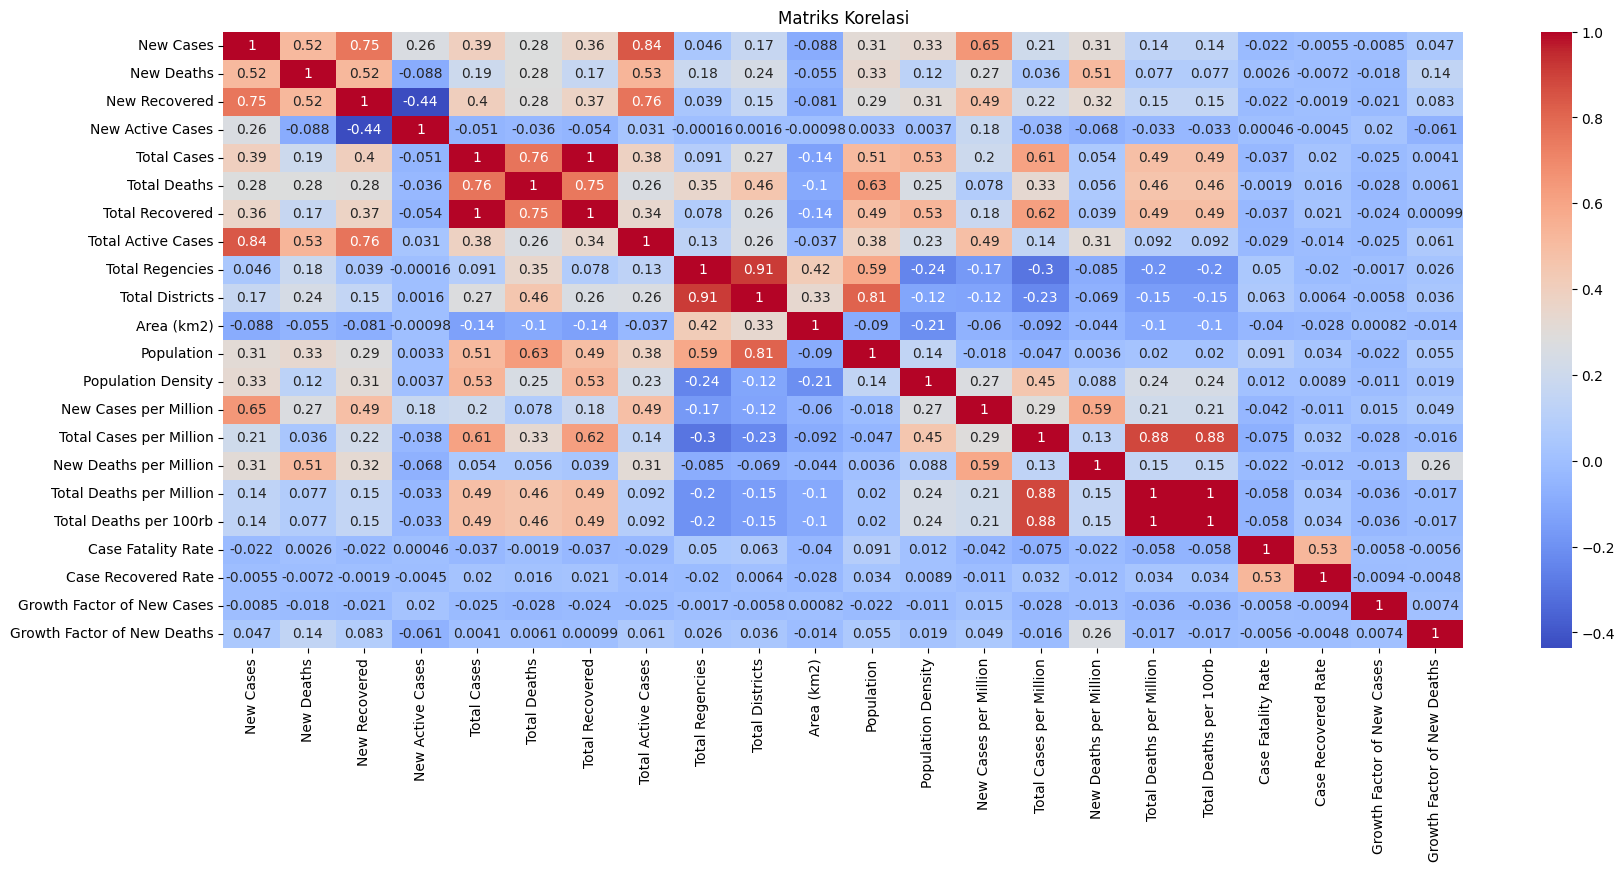

In [ ]:
# Heatmap Korelasi
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

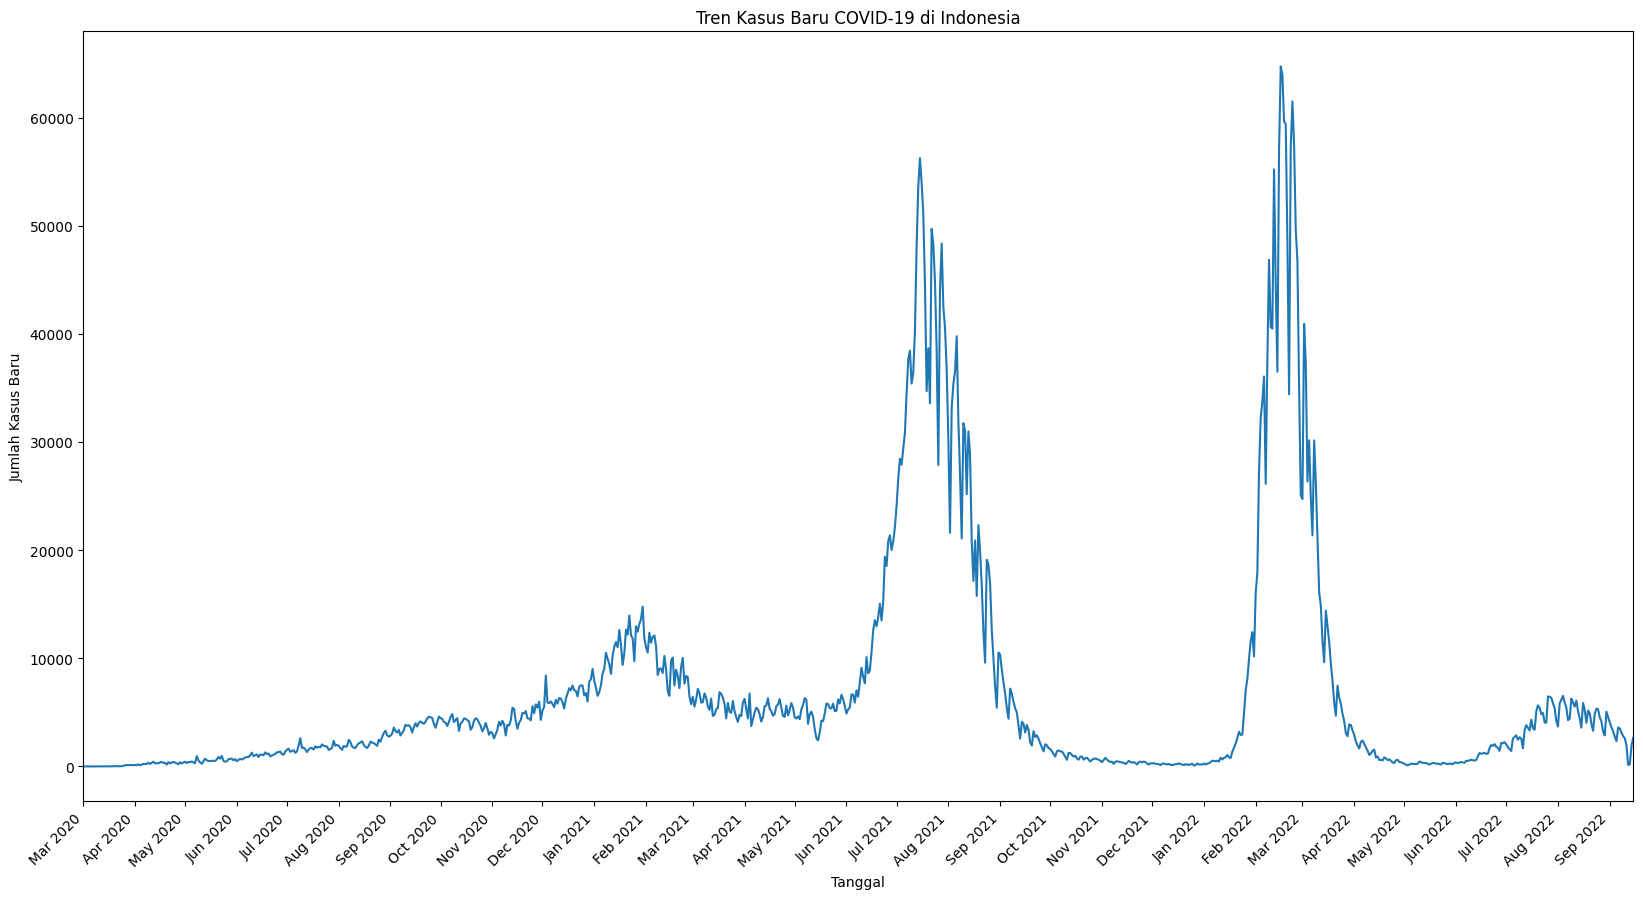

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(20, 10))
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime
df.groupby('Date')['New Cases'].sum().plot(kind='line')
plt.title('Tren Kasus Baru COVID-19 di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus Baru')

# Format x-axis to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format to "Month Year"
plt.xticks(rotation=45, ha='right')  # Rotate for better readability

plt.show()

In [ ]:
df.to_csv('/content/cleaned_covid_19.csv', index=False)

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import col, when, isnull, count
from pyspark.sql.functions import rand

In [ ]:
# Inisialisasi SparkSession
spark = SparkSession.builder.appName("GradientBoostingTCovid19").getOrCreate()

# Muat dataset
file_path = "/content/cleaned_covid_19.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
data.printSchema()
data.show(20)

root
 |-- Date: date (nullable = true)
 |-- Location: string (nullable = true)
 |-- New Cases: integer (nullable = true)
 |-- New Deaths: integer (nullable = true)
 |-- New Recovered: integer (nullable = true)
 |-- New Active Cases: integer (nullable = true)
 |-- Total Cases: integer (nullable = true)
 |-- Total Deaths: integer (nullable = true)
 |-- Total Recovered: integer (nullable = true)
 |-- Total Active Cases: integer (nullable = true)
 |-- Province: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Island: string (nullable = true)
 |-- Total Regencies: integer (nullable = true)
 |-- Total Districts: integer (nullable = true)
 |-- Area (km2): integer (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Population Density: double (nullable = true)
 |-- New Cases per Million: double (nullable = true)
 |-- Total Cases per Million: double (nullable = true)
 |-- New Deaths per Million: double (nullable = true)
 |-- Total Deaths per Million: double (nul

In [ ]:
# Drop kolom location, province, country, island
data = data.drop("location", "province", "country", "island","Date")

In [ ]:
data = data.dropna(subset=["New Cases", "New Deaths", "Population Density", "Growth Factor of New Cases", "Case Fatality Rate"])

In [ ]:
major_class = data.filter(col("Case Fatality Rate") <= 1)
minor_class = data.filter(col("Case Fatality Rate") > 1)
major_class_sample = major_class.orderBy(rand()).limit(minor_class.count())
data_balanced = major_class_sample.union(minor_class)

In [ ]:
data = data.withColumn("label", when(col("Case Fatality Rate") > 3, 1).otherwise(0))

In [ ]:
feature_columns = ["New Cases", "New Deaths", "Population Density", "Growth Factor of New Cases"]
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="feature")
data = vector_assembler.transform(data)

In [ ]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
gbt = GBTClassifier(labelCol="label", featuresCol="feature", seed=60)

In [ ]:
crossval = CrossValidator(estimator=gbt,
                          estimatorParamMaps={},
                          evaluator=MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1"),
                          numFolds=3)

In [ ]:
model = gbt.fit(train_data)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
predictions = model.transform(test_data)
evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy = evaluator_acc.evaluate(predictions) # Use evaluator_acc here
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_score}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Evaluasi ROC AUC
evaluator_roc = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
roc_auc = evaluator_roc.evaluate(predictions)
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.797389885807504
F1 Score: 0.7937447241737412
Precision: 0.7945859791190684
Recall: 0.797389885807504
ROC AUC: 0.8859786264938356


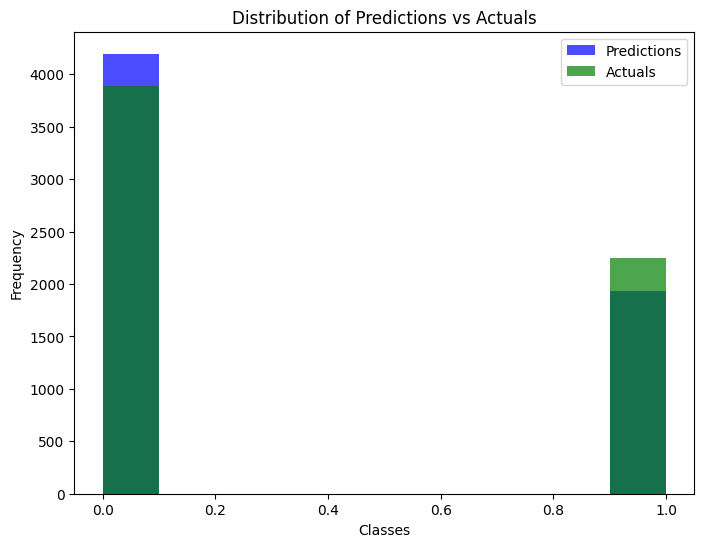

In [ ]:
import matplotlib.pyplot as plt

predicted_df = predictions.select("label", "prediction").toPandas()
plt.figure(figsize=(8, 6))
plt.hist(predicted_df["prediction"], bins=10, alpha=0.7, label="Predictions", color="blue")
plt.hist(predicted_df["label"], bins=10, alpha=0.7, label="Actuals", color="green")
plt.title("Distribution of Predictions vs Actuals")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Gradient Boosted Tree (With Hyperparameter)

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import col, when, isnull, count
from pyspark.sql.functions import rand

In [ ]:
# Inisialisasi SparkSession
spark = SparkSession.builder.appName("GradientBoostingTCovid19").getOrCreate()

# Muat dataset
file_path = "/content/cleaned_covid_19.csv"
data = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
data = data.dropna(subset=["New Cases", "New Deaths", "Population Density", "Growth Factor of New Cases", "Case Fatality Rate"])

In [ ]:
major_class = data.filter(col("Case Fatality Rate") <= 1)
minor_class = data.filter(col("Case Fatality Rate") > 1)
major_class_sample = major_class.orderBy(rand()).limit(minor_class.count())
data_balanced = major_class_sample.union(minor_class)

In [ ]:
data = data.withColumn("label", when(col("Case Fatality Rate") > 3, 1).otherwise(0))

feature_columns = ["New Cases", "New Deaths", "Population Density", "Growth Factor of New Cases"]
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="feature")
data = vector_assembler.transform(data)

In [ ]:
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)
gbt = GBTClassifier(labelCol="label", featuresCol="feature", seed=60)

In [ ]:
#PENAMBAHAN KODINGAN TUNING HYPERPARAMETER
paramGrid = ParamGridBuilder() \
    .addGrid(gbt.maxIter, [5, 10]) \
    .addGrid(gbt.maxDepth, [3, 5]) \
    .build()

crossval = CrossValidator(estimator=gbt,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1"),
                          numFolds=5)

In [ ]:
model = crossval.fit(train_data)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
predictions = model.transform(test_data)
evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy = evaluator_acc.evaluate(predictions) # Use evaluator_acc here
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_score}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Evaluasi ROC AUC
evaluator_roc = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
roc_auc = evaluator_roc.evaluate(predictions)
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.8399673735725938
F1 Score: 0.8365135706097
Precision: 0.8396344651168459
Recall: 0.8399673735725938
ROC AUC: 0.9097485589113732
